In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv(r'C:\Users\Joseph\Documents\Jaihouse.csv')
print(dataset.head())

   MSSubless MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0         60       RL     8450    Inside     1Fam            5       2003   
1         20       RL     9600       FR2     1Fam            8       1976   
2         60       RL    11250    Inside     1Fam            5       2001   
3         70       RL     9550    Corner     1Fam            5       1915   
4         60       RL    14260       FR2     1Fam            5       2000   

   YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalesPrice  
0          2003     VinylSd           0          856      208500  
1          1976     MetalSd           0         1262      181500  
2          2002     VinylSd           0          920      223500  
3          1970     Wd Sdng           0          756      140000  
4          2000     VinylSd           0         1145      250000  


In [16]:
dataset.shape

(5, 12)

In [18]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 0


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

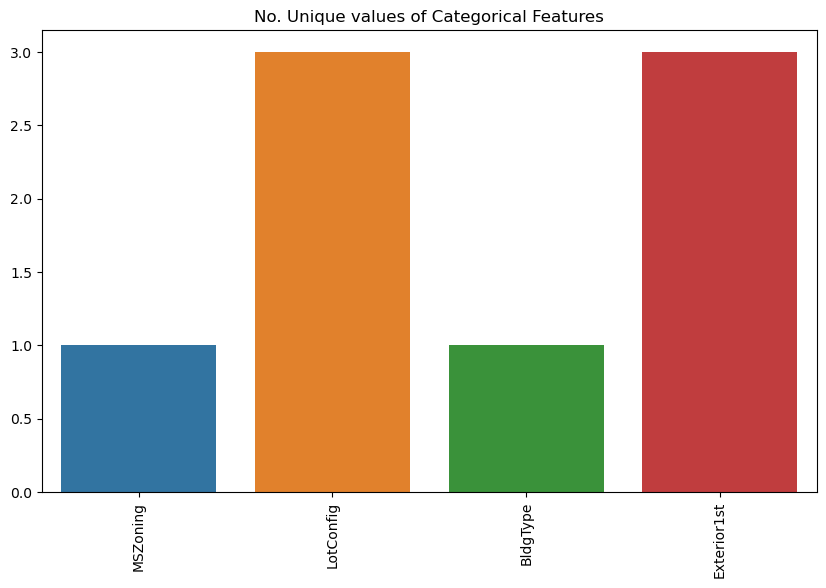

In [19]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

C:\Users\JOSEPH\AppData\Local\Temp\ipykernel_10576\1199953362.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


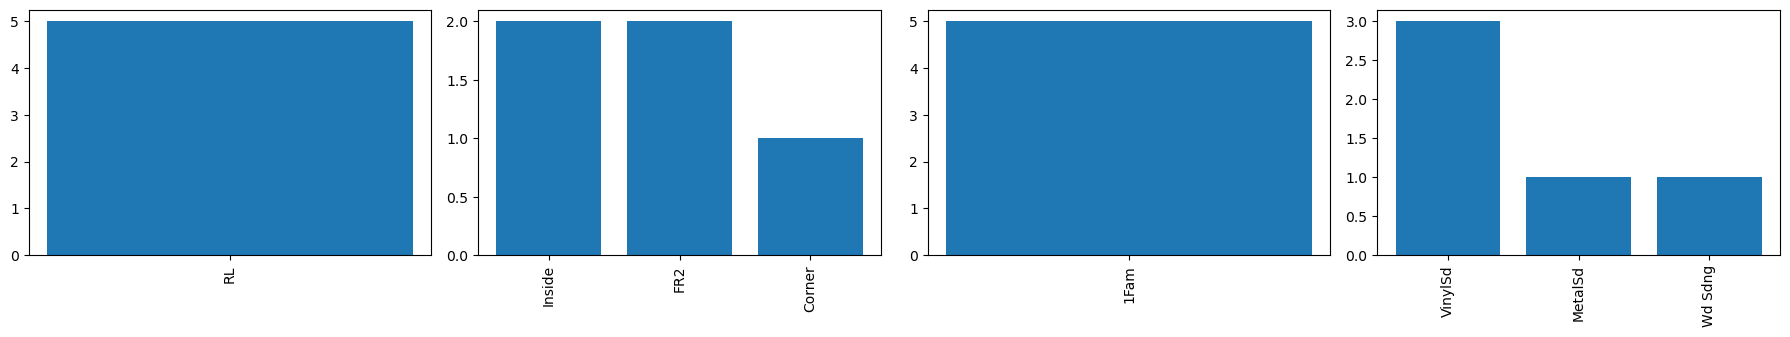

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')

index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.bar(x=list(y.index), height=y)
    plt.xticks(rotation=90)
    index += 1

plt.tight_layout() 
plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv(r'C:\Users\Joseph\Documents\Jaihouse.csv')
print(dataset.head)

# Check if 'Id' column exists, and drop it if it does
if 'Id' in dataset.columns:
    dataset.drop(['Id'], axis=1, inplace=True)
else:
    print("Column 'Id' does not exist in the dataset.")


<bound method NDFrame.head of    MSSubless MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0         60       RL     8450    Inside     1Fam            5       2003   
1         20       RL     9600       FR2     1Fam            8       1976   
2         60       RL    11250    Inside     1Fam            5       2001   
3         70       RL     9550    Corner     1Fam            5       1915   
4         60       RL    14260       FR2     1Fam            5       2000   

   YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalesPrice  
0          2003     VinylSd           0          856      208500  
1          1976     MetalSd           0         1262      181500  
2          2002     VinylSd           0          920      223500  
3          1970     Wd Sdng           0          756      140000  
4          2000     VinylSd           0         1145      250000  >
Column 'Id' does not exist in the dataset.


In [5]:
dataset['SalesPrice'] = dataset['SalesPrice'].fillna(
  dataset['SalesPrice'].mean())

In [6]:
new_dataset = dataset.dropna()

In [7]:
new_dataset.isnull().sum()

MSSubless       0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalesPrice      0
dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
object_cols = [col for col in new_dataset.columns if new_dataset[col].dtype == 'object']
OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore') 
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Example dataset
data = {'Feature1': np.random.rand(100),
        'Feature2': np.random.rand(100),
        'Target': np.random.randint(0, 2, 100)}
df = pd.DataFrame(data)

# Features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the splits
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (80, 2)
X_test shape: (20, 2)
y_train shape: (80,)
y_test shape: (20,)


In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import mean_absolute_percentage_error
X_train, X_valid, Y_train, Y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_valid)
mape = mean_absolute_percentage_error(Y_valid, Y_pred)

print(mape)


1188258464129922.0


In [24]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Assuming X_train, Y_train, X_valid, Y_valid are already defined

# Initialize and train the RandomForestRegressor
model_RFR = RandomForestRegressor(n_estimators=10, random_state=42)
model_RFR.fit(X_train, Y_train)

# Predict on the validation set
Y_pred = model_RFR.predict(X_valid)

# Calculate and print the MAPE
mape = mean_absolute_percentage_error(Y_valid, Y_pred)
print(mape)


1215971899390034.0
